# Hierachal Clustering

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from pylab import *
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import itertools
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score, precision_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

path_to_train_data = "./train.csv"

In [2]:
df = pd.read_csv(path_to_train_data)

def cleanup():
    df.LotFrontage.fillna(df.LotFrontage.median(), inplace=True)
    df.Alley.fillna("None",inplace=True)
    df.MasVnrType.fillna("None",inplace=True)
    df.MasVnrArea.fillna(0.0, inplace=True)
    df.BsmtQual.fillna("None",inplace=True)
    df.BsmtCond.fillna("None",inplace=True)
    df.BsmtExposure.fillna("None",inplace=True)
    df.BsmtFinType1.fillna("None",inplace=True)
    df.BsmtFinType2.fillna("None",inplace=True)
    df.Electrical.fillna("SBrkr",inplace=True)
    df.FireplaceQu.fillna("None",inplace=True)
    df.GarageType.fillna("None",inplace=True)
    df.GarageYrBlt.fillna("None",inplace=True)
    df.GarageFinish.fillna("None",inplace=True)
    df.GarageQual.fillna("None",inplace=True)
    df.GarageCond.fillna("None",inplace=True)
    df.PoolQC.fillna("None",inplace=True)
    df.Fence.fillna("None",inplace=True)
    df.MiscFeature.fillna("None",inplace=True)
    quality_dictionary = {'None': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
    df['ExterQual']   = df['ExterQual'].map(quality_dictionary).astype(int)
    df['ExterCond']   = df['ExterCond'].map(quality_dictionary).astype(int)
    df['BsmtQual']    = df['BsmtQual'].map(quality_dictionary).astype(int)
    df['BsmtCond']    = df['BsmtCond'].map(quality_dictionary).astype(int)
    df['HeatingQC']   = df['HeatingQC'].map(quality_dictionary).astype(int)
    df['KitchenQual'] = df['KitchenQual'].map(quality_dictionary).astype(int)
    df['FireplaceQu'] = df['FireplaceQu'].map(quality_dictionary).astype(int)
    df['GarageQual']  = df['GarageQual'].map(quality_dictionary).astype(int)
    df['GarageCond']  = df['GarageCond'].map(quality_dictionary).astype(int)
    df['PoolQC']      = df['PoolQC'].map(quality_dictionary).astype(int)

    #saving memory
    del quality_dictionary

    df['BsmtExposure'] = df['BsmtExposure'].map({'None': 0, 'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4}).astype(int)

    bsmtdict = {'None': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6}
    df['BsmtFinType1'] = df['BsmtFinType1'].map(bsmtdict).astype(int)
    df['BsmtFinType2'] = df['BsmtFinType2'].map(bsmtdict).astype(int)

    df['Functional'] = df['Functional'].map({'None': 0, 'Sal': 1, 'Sev': 2, 'Maj2': 3, 'Maj1': 4, 
                                             'Mod': 5, 'Min2': 6, 'Min1': 7, 'Typ': 8}).astype(int)

    df['GarageFinish'] = df['GarageFinish'].map({'None': 0, 'Unf': 1, 'RFn': 2, 'Fin': 3}).astype(int)
    df['Fence'] = df['Fence'].map({'None': 0, 'MnWw': 1, 'GdWo': 2, 'MnPrv': 3, 'GdPrv': 4}).astype(int)

    del bsmtdict

cleanup()

In [3]:
df.drop(['YearBuilt'],axis=1,inplace=True)

In [4]:
print ('BsmtExposure: {0}'.format(df['Id'].unique()))

BsmtExposure: [   1    2    3 ..., 1458 1459 1460]


In [12]:
df.drop('GarageYrBlt',axis=1,inplace=True)

In [13]:
enc = LabelEncoder()
for col in df.columns:
    if dtype(df[str(col)]) != float64 or dtype(df[str(col)]) != int64:
        df[str(col)] = enc.fit_transform(df[str(col)])

In [14]:
#df = df.drop('OverallQual', axis=1)
X = df#[['ExterQual', 'BsmtQual', 'GarageFinish', 'OverallQual', 'YearRemodAdd']]
df2 = df.select_dtypes(include=['float64','int64'])
df2 = StandardScaler().fit_transform(X)

In [15]:
# form clusters
hclust = AgglomerativeClustering()
mod = hclust.fit(X)

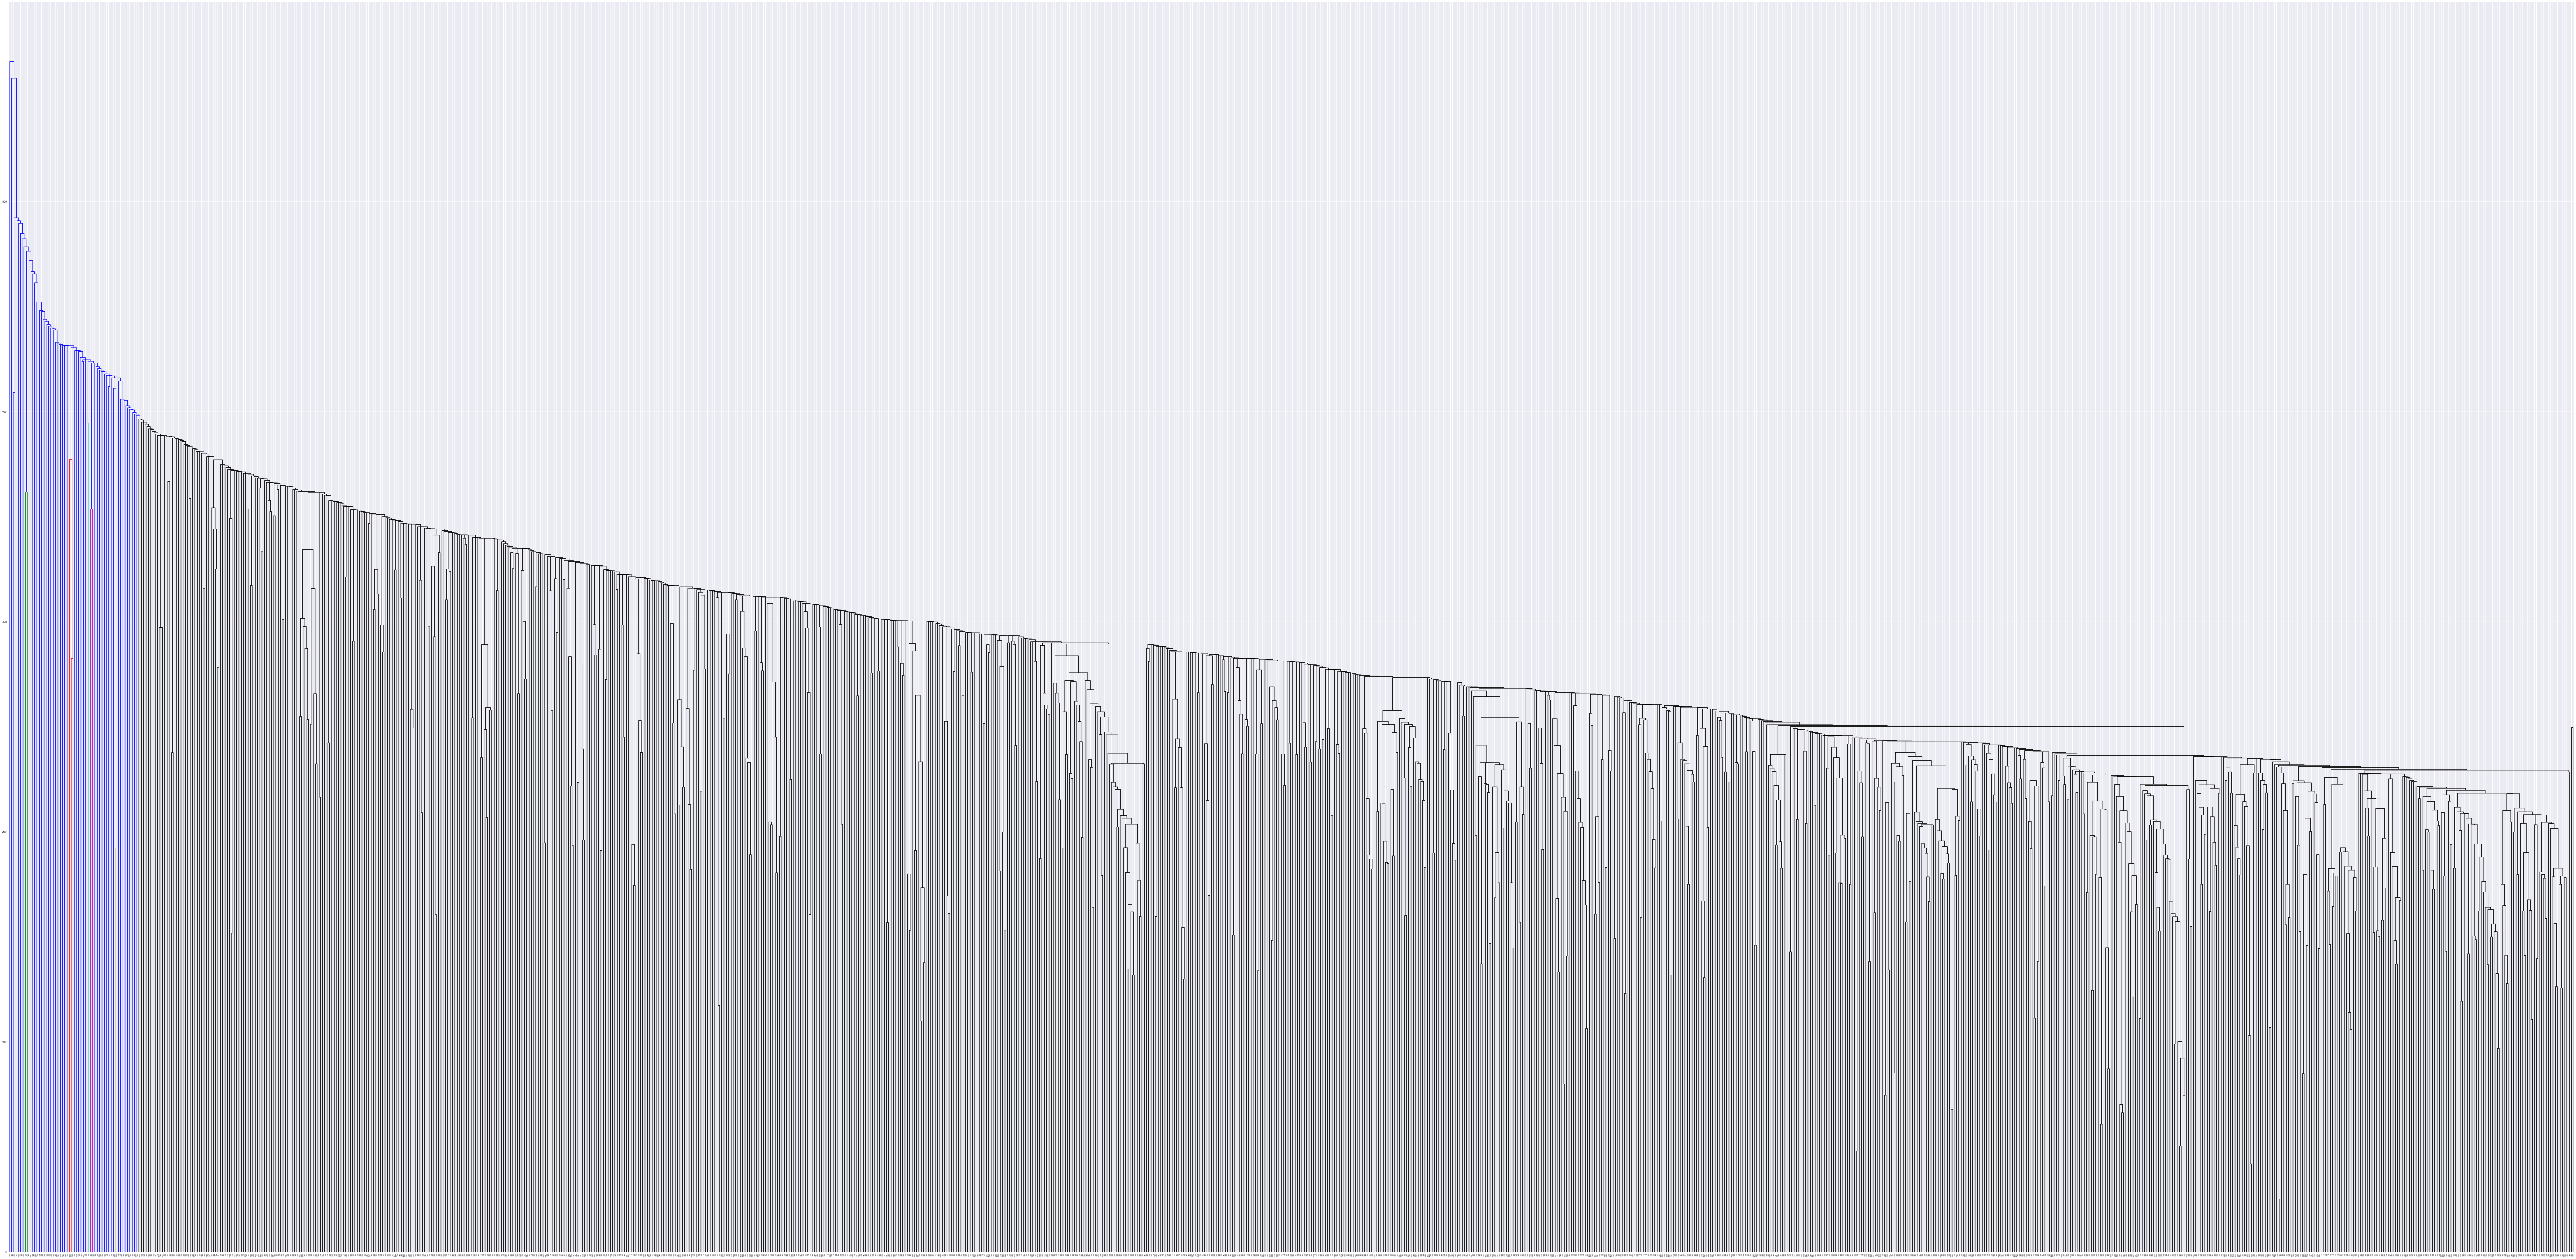

In [20]:
hclust_2 = linkage(X)

# plot dendrogram
# increases figure size
plt.figure(figsize=(160, 80))
dendrogram(hclust_2)
plt.show()

## Paragraph

When building model, we had a goal of finding labels/groupings for our data set. From our visualization, we saw that most of the data was split into two groups, a blue section and a grey section. What was interesting was that more than 80% of the data fell into one label (grey). We also learned from our visualization that there are a couple houses (3-4) that seem to have their own category. These outliers could be considered more closely related to the blue section. In summary, our clustering model shows that there are two main groups that the data set can be grouped/labeled in. 

# K-Means

In [42]:
import numpy as np 
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from pylab import *
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import itertools
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score, precision_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

path_to_train_data = "./train.csv"

In [43]:
df = pd.read_csv(path_to_train_data)

def cleanup():
    df.LotFrontage.fillna(df.LotFrontage.median(), inplace=True)
    df.Alley.fillna("None",inplace=True)
    df.MasVnrType.fillna("None",inplace=True)
    df.MasVnrArea.fillna(0.0, inplace=True)
    df.BsmtQual.fillna("None",inplace=True)
    df.BsmtCond.fillna("None",inplace=True)
    df.BsmtExposure.fillna("None",inplace=True)
    df.BsmtFinType1.fillna("None",inplace=True)
    df.BsmtFinType2.fillna("None",inplace=True)
    df.Electrical.fillna("SBrkr",inplace=True)
    df.FireplaceQu.fillna("None",inplace=True)
    df.GarageType.fillna("None",inplace=True)
    df.GarageYrBlt.fillna("None",inplace=True)
    df.GarageFinish.fillna("None",inplace=True)
    df.GarageQual.fillna("None",inplace=True)
    df.GarageCond.fillna("None",inplace=True)
    df.PoolQC.fillna("None",inplace=True)
    df.Fence.fillna("None",inplace=True)
    df.MiscFeature.fillna("None",inplace=True)
    quality_dictionary = {'None': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
    df['ExterQual']   = df['ExterQual'].map(quality_dictionary).astype(int)
    df['ExterCond']   = df['ExterCond'].map(quality_dictionary).astype(int)
    df['BsmtQual']    = df['BsmtQual'].map(quality_dictionary).astype(int)
    df['BsmtCond']    = df['BsmtCond'].map(quality_dictionary).astype(int)
    df['HeatingQC']   = df['HeatingQC'].map(quality_dictionary).astype(int)
    df['KitchenQual'] = df['KitchenQual'].map(quality_dictionary).astype(int)
    df['FireplaceQu'] = df['FireplaceQu'].map(quality_dictionary).astype(int)
    df['GarageQual']  = df['GarageQual'].map(quality_dictionary).astype(int)
    df['GarageCond']  = df['GarageCond'].map(quality_dictionary).astype(int)
    df['PoolQC']      = df['PoolQC'].map(quality_dictionary).astype(int)

    #saving memory
    del quality_dictionary

    df['BsmtExposure'] = df['BsmtExposure'].map({'None': 0, 'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4}).astype(int)

    bsmtdict = {'None': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6}
    df['BsmtFinType1'] = df['BsmtFinType1'].map(bsmtdict).astype(int)
    df['BsmtFinType2'] = df['BsmtFinType2'].map(bsmtdict).astype(int)

    df['Functional'] = df['Functional'].map({'None': 0, 'Sal': 1, 'Sev': 2, 'Maj2': 3, 'Maj1': 4, 
                                             'Mod': 5, 'Min2': 6, 'Min1': 7, 'Typ': 8}).astype(int)

    df['GarageFinish'] = df['GarageFinish'].map({'None': 0, 'Unf': 1, 'RFn': 2, 'Fin': 3}).astype(int)
    df['Fence'] = df['Fence'].map({'None': 0, 'MnWw': 1, 'GdWo': 2, 'MnPrv': 3, 'GdPrv': 4}).astype(int)

    del bsmtdict

cleanup()

In [44]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

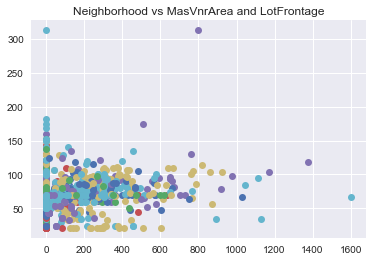

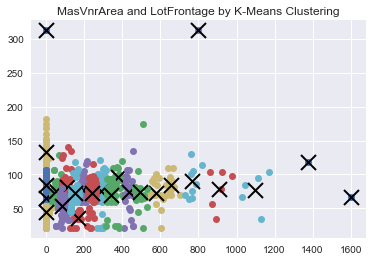

In [45]:
#del df['Id']
#del df['OverallQual']
#del df['SalePrice']

# k is the input parameter set to the number of species
k = len(df['Neighborhood'].unique())
for i in df['Neighborhood'].unique():
    # select only the applicable rows
    ds = df[df['Neighborhood'] == i]
    # plot the points
    plt.plot(ds[['MasVnrArea']],ds[['LotFrontage']],'o')
plt.title("Neighborhood vs MasVnrArea and LotFrontage")
plt.show();

from sklearn import cluster
del df['Neighborhood']
#del df['YearBuilt']
kmeans = cluster.KMeans(n_clusters=k, n_init=10, max_iter=300, algorithm='auto')
kmeans.fit(df[['MasVnrArea','LotFrontage']])
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

for i in range(k):
    # select only data observations from the applicable cluster
    ds = df.iloc[np.where(labels==i)]
    # plot the data observations
    plt.plot(ds['MasVnrArea'],ds['LotFrontage'],'o')
    # plot the centroids
    lines = plt.plot(centroids[i,0],centroids[i,1],'kx')
    # make the centroid x's bigger
    plt.setp(lines,ms=15.0)
    plt.setp(lines,mew=2.0)
plt.title("MasVnrArea and LotFrontage by K-Means Clustering")
plt.show()


## Paragraph

Our goal with this model was to find groupings in neighborhoods. We realized that MasVnrArea and LotFrontage would closely relate to neighborhood groupings so we chose those two things as our features. Our visualization model showed that there are 25 different groupings that the neighborhoods fall in. The positions of the centroids in the model show a sort-of linear pattern that shows that relationship between neighborhood, MasVnrArea, and LotFrontage. To conclude, the K-Mean fitting model did a sufficient job in clustering the data into something that is understandable. 

# PCA

In [47]:
import numpy as np 
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from pylab import *
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import itertools
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score, precision_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

path_to_train_data = "./train.csv"

In [48]:
df = pd.read_csv(path_to_train_data)

def cleanup():
    df.LotFrontage.fillna(df.LotFrontage.median(), inplace=True)
    df.Alley.fillna("None",inplace=True)
    df.MasVnrType.fillna("None",inplace=True)
    df.MasVnrArea.fillna(0.0, inplace=True)
    df.BsmtQual.fillna("None",inplace=True)
    df.BsmtCond.fillna("None",inplace=True)
    df.BsmtExposure.fillna("None",inplace=True)
    df.BsmtFinType1.fillna("None",inplace=True)
    df.BsmtFinType2.fillna("None",inplace=True)
    df.Electrical.fillna("SBrkr",inplace=True)
    df.FireplaceQu.fillna("None",inplace=True)
    df.GarageType.fillna("None",inplace=True)
    df.GarageYrBlt.fillna("None",inplace=True)
    df.GarageFinish.fillna("None",inplace=True)
    df.GarageQual.fillna("None",inplace=True)
    df.GarageCond.fillna("None",inplace=True)
    df.PoolQC.fillna("None",inplace=True)
    df.Fence.fillna("None",inplace=True)
    df.MiscFeature.fillna("None",inplace=True)
    quality_dictionary = {'None': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
    df['ExterQual']   = df['ExterQual'].map(quality_dictionary).astype(int)
    df['ExterCond']   = df['ExterCond'].map(quality_dictionary).astype(int)
    df['BsmtQual']    = df['BsmtQual'].map(quality_dictionary).astype(int)
    df['BsmtCond']    = df['BsmtCond'].map(quality_dictionary).astype(int)
    df['HeatingQC']   = df['HeatingQC'].map(quality_dictionary).astype(int)
    df['KitchenQual'] = df['KitchenQual'].map(quality_dictionary).astype(int)
    df['FireplaceQu'] = df['FireplaceQu'].map(quality_dictionary).astype(int)
    df['GarageQual']  = df['GarageQual'].map(quality_dictionary).astype(int)
    df['GarageCond']  = df['GarageCond'].map(quality_dictionary).astype(int)
    df['PoolQC']      = df['PoolQC'].map(quality_dictionary).astype(int)

    #saving memory
    del quality_dictionary

    df['BsmtExposure'] = df['BsmtExposure'].map({'None': 0, 'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4}).astype(int)

    bsmtdict = {'None': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6}
    df['BsmtFinType1'] = df['BsmtFinType1'].map(bsmtdict).astype(int)
    df['BsmtFinType2'] = df['BsmtFinType2'].map(bsmtdict).astype(int)

    df['Functional'] = df['Functional'].map({'None': 0, 'Sal': 1, 'Sev': 2, 'Maj2': 3, 'Maj1': 4, 
                                             'Mod': 5, 'Min2': 6, 'Min1': 7, 'Typ': 8}).astype(int)

    df['GarageFinish'] = df['GarageFinish'].map({'None': 0, 'Unf': 1, 'RFn': 2, 'Fin': 3}).astype(int)
    df['Fence'] = df['Fence'].map({'None': 0, 'MnWw': 1, 'GdWo': 2, 'MnPrv': 3, 'GdPrv': 4}).astype(int)

    del bsmtdict

cleanup()

In [49]:
df.drop('GarageYrBlt',axis=1,inplace=True)

In [50]:
enc = LabelEncoder()
for col in df.columns:
    if dtype(df[str(col)]) != float64 or dtype(df[str(col)]) != int64:
        df[str(col)] = enc.fit_transform(df[str(col)])

In [51]:
df = StandardScaler().fit_transform(df)

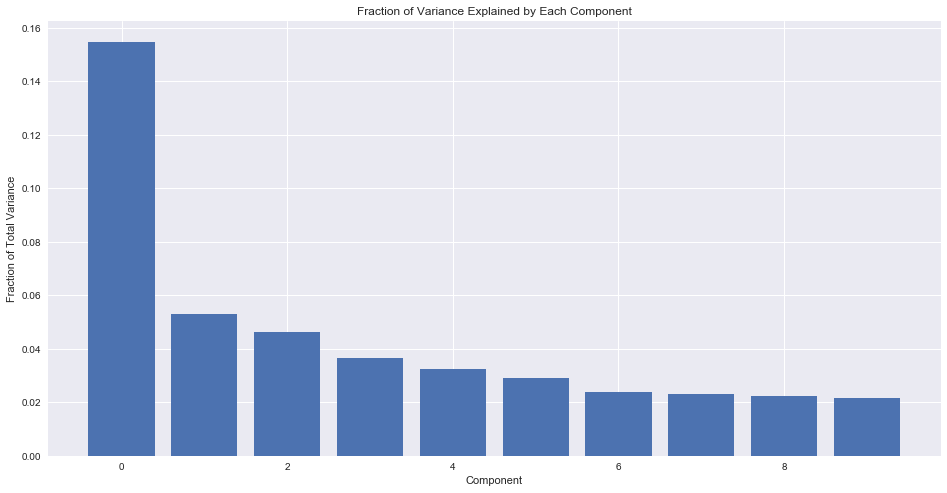

In [58]:
# perform PCA
pca = PCA(n_components=10).fit(df)

# plot fraction of variance explained by each component
pca.explained_variance_ratio_
x = np.arange(10)
plt.figure(figsize=(16, 8))
plt.bar(x, pca.explained_variance_ratio_)
plt.title('Fraction of Variance Explained by Each Component')
plt.xlabel('Component')
plt.ylabel('Fraction of Total Variance')
plt.show()

## Paragraph

Initially, we dropped GarageYrBlt because this column made it difficult to encode the data. We then ran it through a label-encoder and a standard scaler. Afterwards, we fit the data using PCA and plotted the variance ratio for the top ten components of the data. The visualization told us that there was one component that was prominent and the rest of the components were generally at the same level. In summary, the PCA model confirms our initial belief that there is one component that is the strongest variance and the rest of the components fall under a group of very low variance. 